In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

from sklearn.metrics import silhouette_samples, silhouette_score

from IPython.display import display, HTML

In [2]:
CLUSTER_DICT = {
    'uraian_jenis_perusahaan': 'Uraian Jenis Perusahaan',
    'uraian_risiko_proyek' : 'Uraian Risiko Proyek',
    'skala_usaha': 'Skala Usaha',
    'golongan_kbli': 'Golongan KBLI',
}

In [3]:
TARGET_COLUMN = 'uraian_jenis_perusahaan'

In [4]:
df = pd.read_csv('transform_datasets/transform_df_'+ TARGET_COLUMN +'.csv')
df.set_index('kecamatan', inplace=True)

In [5]:
df

,Perorangan,Perseroan Terbatas (PT),Persekutuan Komanditer (CV / Commanditaire Vennootschap),Badan Hukum Lainnya,Perseroan Terbatas (PT) Perorangan,Koperasi,Badan Layanan Umum (BLU)
kecamatan,,,,,,,
Amurang,96,42,244,56,3,1,0
Amurang Barat,56,21,127,0,17,8,0
Suluun Tareran,53,2,0,0,0,0,0
Tumpaan,67,14,141,0,0,0,0
Amurang Timur,65,12,105,68,0,10,2
Tenga,41,5,29,0,0,0,0
Maesaan,23,2,34,0,0,0,0
Motoling,70,3,4,0,0,0,0
Motoling Timur,25,0,68,0,0,0,0


## Menentukan Jumlah Cluster

### Elbow Method

In [6]:
def visualizeElbow(df, KmeansModel):
    visualizer = KElbowVisualizer(KmeansModel, k=(2,10))
    visualizer.fit(df)
    visualizer.show()

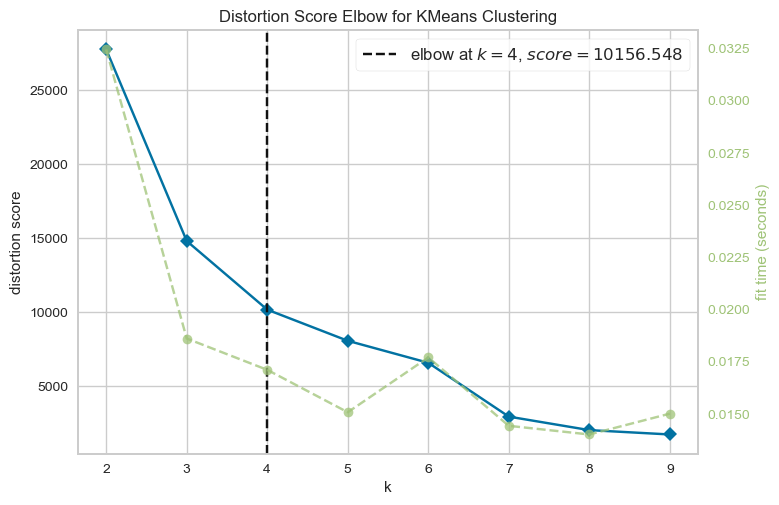

In [7]:
model = KMeans(
    init="random",
    n_init=10,
    max_iter=300,
    random_state=42
)

visualizeElbow(df, model)

### Silhouette Method

In [8]:
def visualizeSilhouette(df, KmeansModel):
    visualizer = SilhouetteVisualizer(KmeansModel, colors='yellowbrick')
    visualizer.fit(df)
    visualizer.show()

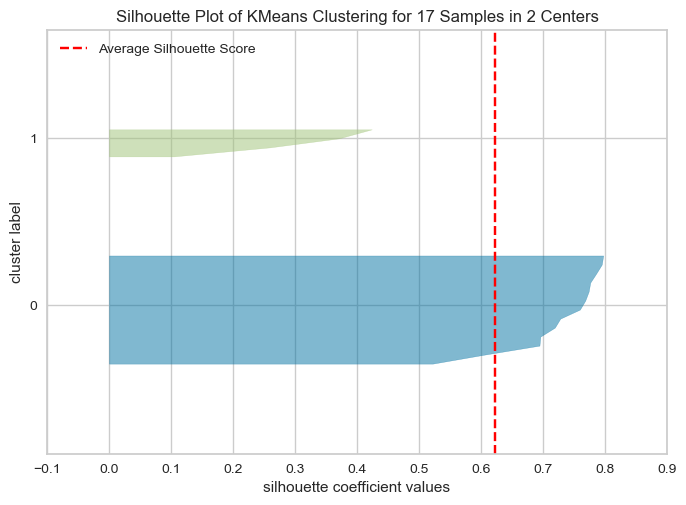

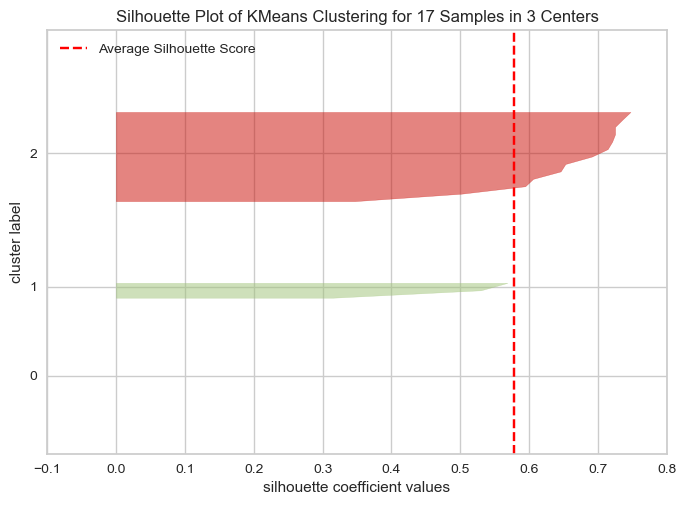

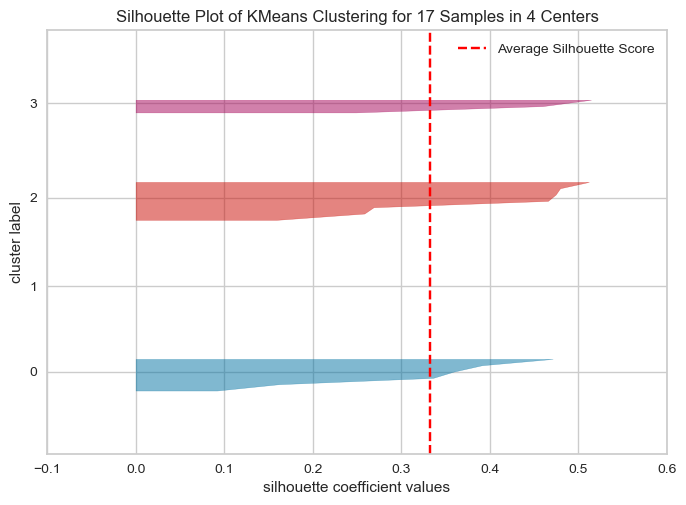

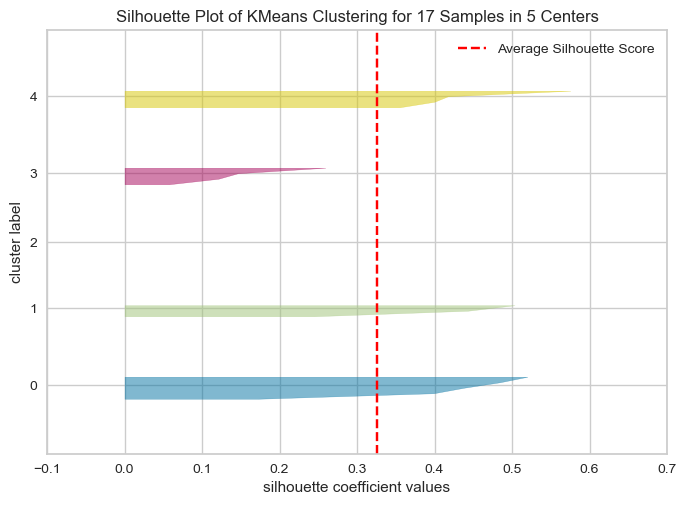

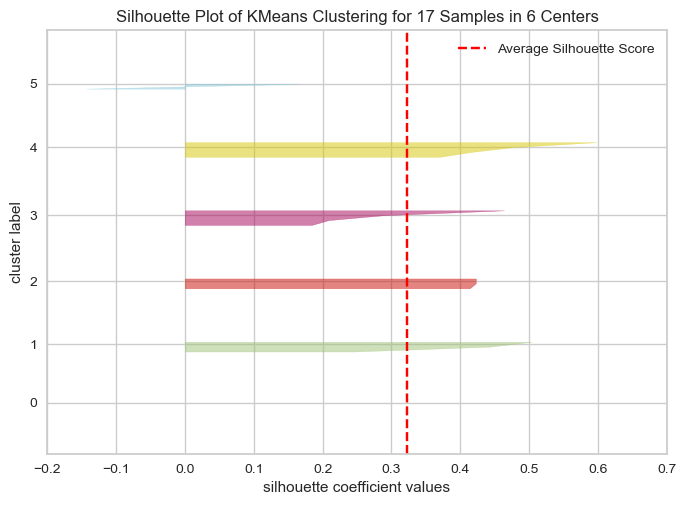

In [9]:
for n_cluster in range(2,7):
    model = KMeans(
        init="random",
        n_clusters=n_cluster,
        n_init=10,
        max_iter=300,
        random_state=42
    )
    visualizeSilhouette(df, model)

# Kmeans Clustering

In [10]:
NUMBER_OF_CLUSTER = 4

In [11]:
kmeans = KMeans(
    init="random",
    n_clusters=NUMBER_OF_CLUSTER,
    n_init=10,
    max_iter=300,
    random_state=42
)
clusters_label = kmeans.fit_predict(df)

In [12]:
clusters_label

array([1, 3, 0, 3, 3, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0])

In [13]:
clusters_label_mapped = list(map(lambda x: 'C' + str(x), clusters_label))

In [14]:
df['cluster'] = clusters_label_mapped

In [15]:
df

,Perorangan,Perseroan Terbatas (PT),Persekutuan Komanditer (CV / Commanditaire Vennootschap),Badan Hukum Lainnya,Perseroan Terbatas (PT) Perorangan,Koperasi,Badan Layanan Umum (BLU),cluster
kecamatan,,,,,,,,
Amurang,96,42,244,56,3,1,0,C1
Amurang Barat,56,21,127,0,17,8,0,C3
Suluun Tareran,53,2,0,0,0,0,0,C0
Tumpaan,67,14,141,0,0,0,0,C3
Amurang Timur,65,12,105,68,0,10,2,C3
Tenga,41,5,29,0,0,0,0,C2
Maesaan,23,2,34,0,0,0,0,C2
Motoling,70,3,4,0,0,0,0,C0
Motoling Timur,25,0,68,0,0,0,0,C2


# Deskripsi Cluster

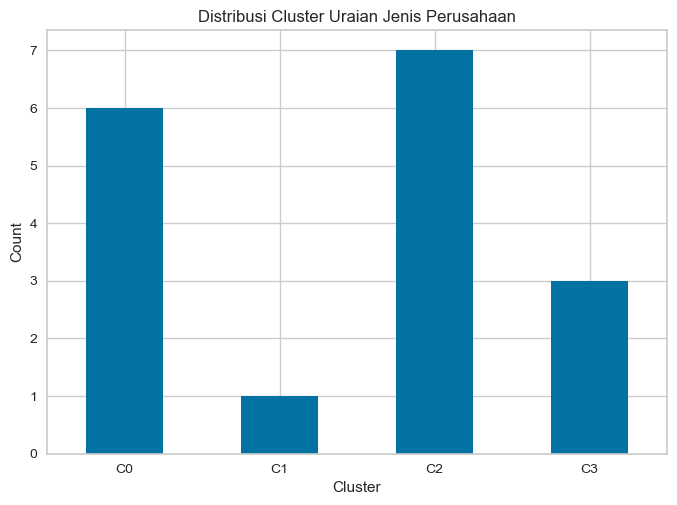

In [16]:
df['cluster'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.xlabel('Cluster', rotation=0)
plt.ylabel('Count')
plt.title('Distribusi Cluster ' + CLUSTER_DICT[TARGET_COLUMN])
plt.show()

In [17]:
for cluster in df.cluster.unique():
    print("\nData ", CLUSTER_DICT[TARGET_COLUMN], "cluster: ", cluster)
    display_df = df.loc[df.cluster == cluster]
    display(HTML(display_df.to_html()))
    print('Deskripsi cluster')
    display(HTML(display_df.describe().to_html()))
    
    
    
    
    print('\n\n\n\n----------------------------------------------------------------------')


Data  Uraian Jenis Perusahaan cluster:  C1


,Perorangan,Perseroan Terbatas (PT),Persekutuan Komanditer (CV / Commanditaire Vennootschap),Badan Hukum Lainnya,Perseroan Terbatas (PT) Perorangan,Koperasi,Badan Layanan Umum (BLU),cluster
kecamatan,,,,,,,,
Amurang,96,42,244,56,3,1,0,C1


Deskripsi cluster


,Perorangan,Perseroan Terbatas (PT),Persekutuan Komanditer (CV / Commanditaire Vennootschap),Badan Hukum Lainnya,Perseroan Terbatas (PT) Perorangan,Koperasi,Badan Layanan Umum (BLU)
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,96.0,42.0,244.0,56.0,3.0,1.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,96.0,42.0,244.0,56.0,3.0,1.0,0.0
25%,96.0,42.0,244.0,56.0,3.0,1.0,0.0
50%,96.0,42.0,244.0,56.0,3.0,1.0,0.0
75%,96.0,42.0,244.0,56.0,3.0,1.0,0.0
max,96.0,42.0,244.0,56.0,3.0,1.0,0.0






----------------------------------------------------------------------

Data  Uraian Jenis Perusahaan cluster:  C3


,Perorangan,Perseroan Terbatas (PT),Persekutuan Komanditer (CV / Commanditaire Vennootschap),Badan Hukum Lainnya,Perseroan Terbatas (PT) Perorangan,Koperasi,Badan Layanan Umum (BLU),cluster
kecamatan,,,,,,,,
Amurang Barat,56,21,127,0,17,8,0,C3
Tumpaan,67,14,141,0,0,0,0,C3
Amurang Timur,65,12,105,68,0,10,2,C3


Deskripsi cluster


,Perorangan,Perseroan Terbatas (PT),Persekutuan Komanditer (CV / Commanditaire Vennootschap),Badan Hukum Lainnya,Perseroan Terbatas (PT) Perorangan,Koperasi,Badan Layanan Umum (BLU)
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,62.666667,15.666667,124.333333,22.666667,5.666667,6.000000,0.666667
std,5.859465,4.725816,18.147543,39.259818,9.814955,5.291503,1.154701
min,56.000000,12.000000,105.000000,0.000000,0.000000,0.000000,0.000000
25%,60.500000,13.000000,116.000000,0.000000,0.000000,4.000000,0.000000
50%,65.000000,14.000000,127.000000,0.000000,0.000000,8.000000,0.000000
75%,66.000000,17.500000,134.000000,34.000000,8.500000,9.000000,1.000000
max,67.000000,21.000000,141.000000,68.000000,17.000000,10.000000,2.000000






----------------------------------------------------------------------

Data  Uraian Jenis Perusahaan cluster:  C0


,Perorangan,Perseroan Terbatas (PT),Persekutuan Komanditer (CV / Commanditaire Vennootschap),Badan Hukum Lainnya,Perseroan Terbatas (PT) Perorangan,Koperasi,Badan Layanan Umum (BLU),cluster
kecamatan,,,,,,,,
Suluun Tareran,53,2,0,0,0,0,0,C0
Motoling,70,3,4,0,0,0,0,C0
Modoinding,79,31,26,0,2,0,0,C0
Ranoyapo,25,1,5,0,0,0,0,C0
Motoling Barat,32,1,0,0,0,0,0,C0
Tatapaan,45,2,8,0,0,0,0,C0


Deskripsi cluster


,Perorangan,Perseroan Terbatas (PT),Persekutuan Komanditer (CV / Commanditaire Vennootschap),Badan Hukum Lainnya,Perseroan Terbatas (PT) Perorangan,Koperasi,Badan Layanan Umum (BLU)
count,6.000000,6.000000,6.000000,6.0,6.000000,6.0,6.0
mean,50.666667,6.666667,7.166667,0.0,0.333333,0.0,0.0
std,21.077634,11.944315,9.724539,0.0,0.816497,0.0,0.0
min,25.000000,1.000000,0.000000,0.0,0.000000,0.0,0.0
25%,35.250000,1.250000,1.000000,0.0,0.000000,0.0,0.0
50%,49.000000,2.000000,4.500000,0.0,0.000000,0.0,0.0
75%,65.750000,2.750000,7.250000,0.0,0.000000,0.0,0.0
max,79.000000,31.000000,26.000000,0.0,2.000000,0.0,0.0






----------------------------------------------------------------------

Data  Uraian Jenis Perusahaan cluster:  C2


,Perorangan,Perseroan Terbatas (PT),Persekutuan Komanditer (CV / Commanditaire Vennootschap),Badan Hukum Lainnya,Perseroan Terbatas (PT) Perorangan,Koperasi,Badan Layanan Umum (BLU),cluster
kecamatan,,,,,,,,
Tenga,41,5,29,0,0,0,0,C2
Maesaan,23,2,34,0,0,0,0,C2
Motoling Timur,25,0,68,0,0,0,0,C2
Tompaso Baru,27,16,40,0,1,0,0,C2
Tareran,57,2,43,0,3,0,0,C2
Sinonsayang,44,2,27,0,10,0,0,C2
Kumelembuai,16,2,44,0,0,0,0,C2


Deskripsi cluster


,Perorangan,Perseroan Terbatas (PT),Persekutuan Komanditer (CV / Commanditaire Vennootschap),Badan Hukum Lainnya,Perseroan Terbatas (PT) Perorangan,Koperasi,Badan Layanan Umum (BLU)
count,7.000000,7.000000,7.000000,7.0,7.000000,7.0,7.0
mean,33.285714,4.142857,40.714286,0.0,2.000000,0.0,0.0
std,14.430457,5.429198,13.732131,0.0,3.696846,0.0,0.0
min,16.000000,0.000000,27.000000,0.0,0.000000,0.0,0.0
25%,24.000000,2.000000,31.500000,0.0,0.000000,0.0,0.0
50%,27.000000,2.000000,40.000000,0.0,0.000000,0.0,0.0
75%,42.500000,3.500000,43.500000,0.0,2.000000,0.0,0.0
max,57.000000,16.000000,68.000000,0.0,10.000000,0.0,0.0






----------------------------------------------------------------------


### Simpan Hasil Cluster